In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('3_all_split_role.csv')
df['Type of Violence'].unique()

array(['Physical, Verbal', 'Verbal', 'Physical',
       'Attempted Violence (near miss)', 'Written and/or Digital',
       'Verbal, Attempted Violence (near miss)',
       'Attempted Violence (Near Miss)', 'Written/Digital',
       'Abuse/Assault (Physical)', 'Abuse/Assault (Verbal)',
       'Sexual Contact', 'abuse/assault (verbal)',
       'Aggression Toward an Inanimate Object',
       'Abuse/Assault (Physical Attempted)', 'Sexual Harassment',
       'Threat of Violence', 'Stalking', 'Abuse/Assault (verbal)',
       'Disorderly Person', 'Alleged Abuse/Assault',
       'Property Damage/Vandalism', nan], dtype=object)

## Split & Mapping

In [ ]:
# Split 'Type of Violence' by comma and explode into separate rows
df['Type of Violence'] = df['Type of Violence'].str.split(', ')
df = df.explode('Type of Violence')
df['Type of Violence'] = df['Type of Violence'].str.strip()

# Fill NaN with 'Unknown' for clarity
df['Type of Violence'] = df['Type of Violence'].fillna('Unknown')

In [ ]:
# Define mapping to general categories
violence_mapping = {
    'Physical': 'Physical Violence',
    'Verbal': 'Verbal Abuse',
    'Attempted Violence (near miss)': 'Attempted Violence',
    'Attempted Violence (Near Miss)': 'Attempted Violence',
    'Written and/or Digital': 'Written/Digital',
    'Written/Digital': 'Written/Digital',
    'Abuse/Assault (Physical)': 'Physical Violence',
    'Abuse/Assault (Verbal)': 'Verbal Abuse',
    'abuse/assault (verbal)': 'Verbal Abuse',
    'Sexual Contact': 'Sexual Violence',
    'Aggression Toward an Inanimate Object': 'Disorderly Conduct',
    'Abuse/Assault (Physical Attempted)': 'Attempted Violence',
    'Sexual Harassment': 'Sexual Violence',
    'Threat of Violence': 'Threat',
    'Stalking': 'Stalking',
    'Abuse/Assault (verbal)': 'Verbal Abuse',
    'Disorderly Person': 'Disorderly Conduct',
    'Alleged Abuse/Assault': 'Alleged Abuse',
    'Property Damage/Vandalism': 'Property Damage',
    'Unknown': 'Unknown'
}

In [ ]:
# Apply mapping and handle unmapped categories
df['General Violence_Category'] = df['Type of Violence'].map(violence_mapping)
df['General Violence_Category'] = df['General Violence_Category'].fillna('Other')

In [ ]:
df['General Violence_Category'].unique()

array(['Physical Violence', 'Verbal Abuse', 'Attempted Violence',
       'Written/Digital', 'Sexual Violence', 'Disorderly Conduct',
       'Threat', 'Stalking', 'Alleged Abuse', 'Property Damage',
       'Unknown'], dtype=object)

In [40]:
df.head()

,Event Date,Facility Type,Department/Office Incident Took Place,Occupational Category of Person Affected,Aggressor,Type of Violence,Primary Contributing Factors,Severity of Assault,Primary Assault Description,Assault Description,Emotional and/ or Psychological Impact,Level of Care Needed,Response Action Taken,Split Roles,General Role,General Violence_Category
0,1/9/2024,ED,Nurses station,"Nurse (RN, LPN), Nurse (RN, LPN)",Patient,Physical,Homelessness/Lack of Housing,Mild - Mild Soreness/Abrasions/Scratches/Small...,"Verbal Assault, Pushing/Shoving, Harassment",Head-butted another patient,Mild - Upset/Angry/Scared/Humiliated,NaN,"Security Called, Law Enforcement Called, De-es...","Nurse (RN, LPN)",Nurse,Physical Violence
0,1/9/2024,ED,Nurses station,"Nurse (RN, LPN), Nurse (RN, LPN)",Patient,Verbal,Homelessness/Lack of Housing,Mild - Mild Soreness/Abrasions/Scratches/Small...,"Verbal Assault, Pushing/Shoving, Harassment",Head-butted another patient,Mild - Upset/Angry/Scared/Humiliated,NaN,"Security Called, Law Enforcement Called, De-es...","Nurse (RN, LPN)",Nurse,Verbal Abuse
1,1/9/2024,ED,Nurses station,"Nurse (RN, LPN), Nurse (RN, LPN)",Patient,Physical,Homelessness/Lack of Housing,Mild - Mild Soreness/Abrasions/Scratches/Small...,"Verbal Assault, Pushing/Shoving, Harassment",Head-butted another patient,Mild - Upset/Angry/Scared/Humiliated,NaN,"Security Called, Law Enforcement Called, De-es...","Nurse (RN, LPN)",Nurse,Physical Violence
1,1/9/2024,ED,Nurses station,"Nurse (RN, LPN), Nurse (RN, LPN)",Patient,Verbal,Homelessness/Lack of Housing,Mild - Mild Soreness/Abrasions/Scratches/Small...,"Verbal Assault, Pushing/Shoving, Harassment",Head-butted another patient,Mild - Upset/Angry/Scared/Humiliated,NaN,"Security Called, Law Enforcement Called, De-es...","Nurse (RN, LPN)",Nurse,Verbal Abuse
2,2/6/2024,ED,Patient room,"Nurse (RN, LPN), Security, Allied Health/Techn...",Patient,Physical,"Altered Mental Status, Inpatient Bed Unavailable",None - No Contact/Unwanted Contact w/No Injury,"Grabbing/Pinching/Scratching/Hair Pull, Kickin...",NaN,None - No emotional and/or Psychological Impact,NaN,"Security Called, Law Enforcement Called, Physi...","Nurse (RN, LPN)",Nurse,Physical Violence


In [41]:
df.to_csv('all_split_vtype.csv', index=False)

## Graph

<ipython-input-39-ba17d4f7fd57>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
<ipython-input-39-ba17d4f7fd57>:13: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bar_plot = sns.barplot(


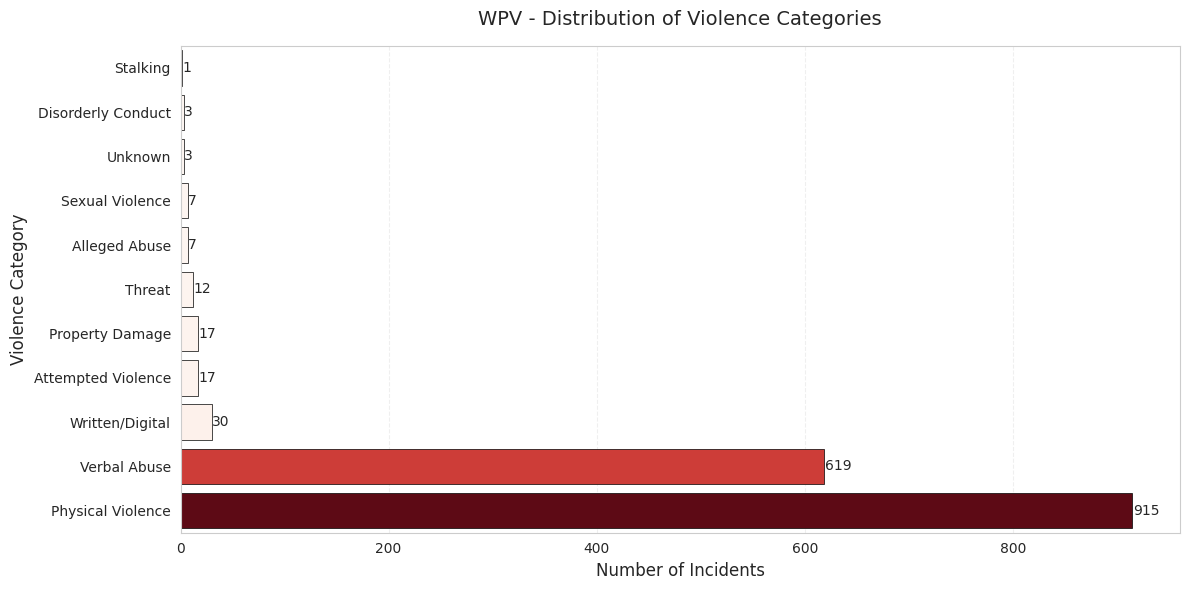

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Count and sort categories
category_counts = df['General Violence_Category'].value_counts().sort_values(ascending=True)

# palette = sns.color_palette("Reds_r", len(category_counts))

norm = plt.Normalize(category_counts.min(), category_counts.max())
palette = plt.cm.Reds(norm(category_counts))

# Plot
bar_plot = sns.barplot(
    x=category_counts.values,
    y=category_counts.index,
    palette=palette,
    edgecolor="black",
    linewidth=0.5,
    saturation=0.8
)

# Customize
plt.title("WPV - Distribution of Violence Categories", fontsize=14, pad=15)
plt.xlabel("Number of Incidents", fontsize=12)
plt.ylabel("Violence Category", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.3)

# Add value labels
for i, count in enumerate(category_counts):
    bar_plot.text(count + 0.5, i, f"{count}", va="center", fontsize=10)

plt.tight_layout()
plt.show()

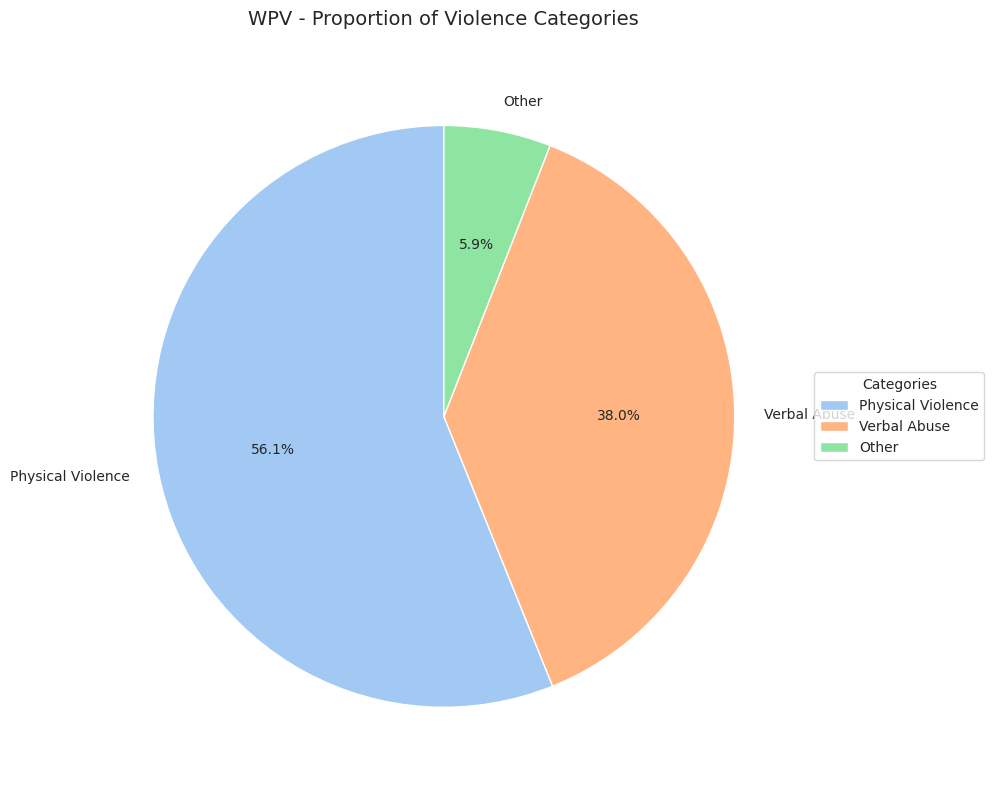

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_style("white")

# Count categories and filter small slices
category_counts = df['General Violence_Category'].value_counts()
min_threshold = 0.02 * category_counts.sum()  # Group tiny categories into "Other"
filtered_counts = category_counts[category_counts > min_threshold]
other_count = category_counts[category_counts <= min_threshold].sum()
if other_count > 0:
    filtered_counts["Other"] = other_count

# Custom colors
colors = sns.color_palette("pastel")[:len(filtered_counts)]

# Plot
plt.pie(
    filtered_counts,
    labels=filtered_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "white", "linewidth": 1},
    textprops={"fontsize": 10}
)

# Add title and legend
plt.title("WPV - Proportion of Violence Categories", fontsize=14, pad=20)
plt.legend(
    filtered_counts.index,
    title="Categories",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.tight_layout()
plt.show()